### Part 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

We are to determine using three questions if the calculation of AOV is accurate and if not which better metric could we use.

#### Importing the necessary libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)




#### Reading the CSV file 
This data set is publicly provided in the shopify data science intern job posting and has been downloaded and saved as a csv file

In [2]:
# Reading the csv file

shop_stores = pd.read_csv(r'C:\Users\Public\Documents\Shopify Application\Data Science Intern Challenge Data Set - Sheet1.csv')

After our data containg the shopify stores have been read, The next step is to visually inspect the data and makesure it has been read properly. The first 10 rows of the data would be printed for the visual inspection. We would also check for null values and makesure the data types for the columns of interest are read properly

In [3]:
# print out the first 20 rows

shop_stores.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [4]:
# Printing the information from the imported file to perform quick sanity check
shop_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
# checking how many unique entries there are inthe data
print(len(pd.unique(shop_stores['shop_id'])))

100


#### From our sanity check
1. There are 5000 data points
2. There are 100 unique stores that sell sneakers
3. There are no null values 
4. The data type for all columns are properly attributed except the payment method and created at columns that have the data type object instead of string and datetime64. For the purpose of this analysis, these columns would not be converted as they are not needed

#### Question 1. Think about what could be going wrong with our calculation of AOV? Think about a better way to evaluate this data. 

#### Answer Summary

The average order value of 3145.13 is skewed because of two assumptions that have been tested
1. Some stores carry sneakers that are significantly more expensive than orders. Infact at least one store sells one sneaker for 25,725 dollars
2. Two stores generally have higher orders than the rest and these two stores are shop id 42 and 78.

With that being said, the average or mean would not be considered the better measure of central tendency



Below is how I arrived at the answer

In [6]:
# Describing the order amount column
shop_stores.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


As shown above, the average order is calculated as 3145.13. However, two other calculations stand out and these are the minimum order and the maximum order. The minimum order amount is 90.00 and the maximum as shown is 704,000. This is such a large difference. One assumption could be that some stores carry sneakers that are way more expensive than others. To check this assumption, we would create a caluclated column to show the price per item sold.

### Creating a calculated column for price per unit for the stores.

In [7]:
# Creating the column price per unit

shop_stores['price_per_unit'] = shop_stores['order_amount'] / shop_stores['total_items']

shop_stores.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_unit
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0



Now that the Price per unit column has been created, the next step would be to describe the column now to check for the average prices in the store

In [8]:
# what is the average prices in the store?
shop_stores.price_per_unit.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_unit, dtype: float64

As we can see, on average the sneakers sell for 387 dollars. However, again pointing out that there is at least one store that sells the sneakers for 90 dollars and at least one store that sells sneakers for 25,725 dollars. So the assumption that some stores have sneakers that are way more expensive is considered true. This could skew our calulation of Average order Value.


The next assumption to be considered is that the orders are significantly higher for some stores than others. To check for this assumption (or hypothesis) we would plot a scatter plot to show the order amounts versus the shop id. 


<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

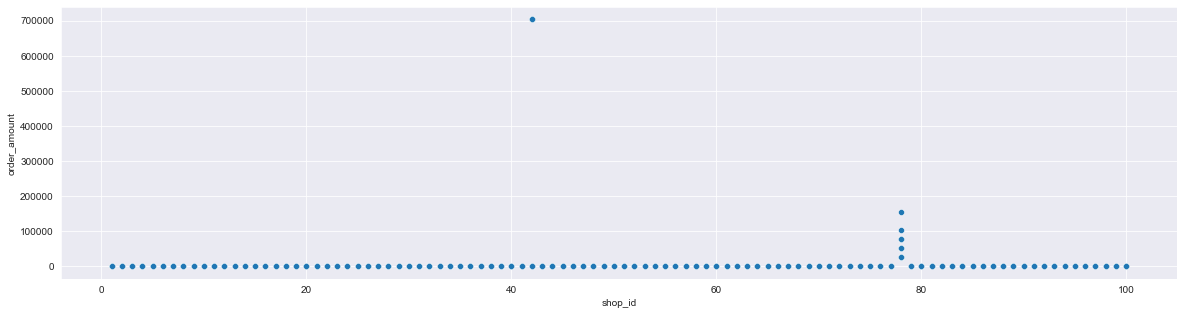

In [9]:
# Plot a scatterplot using for total items vs the order amount

sns.scatterplot(data = shop_stores, x = 'shop_id', y = 'order_amount')

As shown in above, there are some stores that have signficantly higher orders than others. This could also potentially skew the results for the average order value. The next step would be to find which stores have order values higher than the average amount pf 3145.13

In [10]:
store_over_average= shop_stores[shop_stores['order_amount'] > 3145.13]
print(store_over_average['shop_id'])

15      42
60      42
160     78
490     78
493     78
        ..
4646    42
4715    78
4868    42
4882    42
4918    78
Name: shop_id, Length: 63, dtype: int64


Our second assumption tests true. There are two stores that significantly have higher orders than the rest and those stores have the shop id 42 and 78. Again, these higher order amounts in these two stores would defintely skew our average order value

#### Question 2. What metric would you report for this dataset?

#### Answer Summary to Question 2.

Removing the outliers would not be a very good idea based on the explanation given above. There are three measures of central tendencies. Mean, median and mode. The mean generally would be a good measure however when there are data points that skew our data, the median would be considered the better measure of central tendencies. The median shows the mid point of the dataset and is not influenced by the outliers.


Due to our findings, we have established that the mean is not the better measure of central tendency in our data.

In order to determine a more accurate average order value we could remove the outliers and measure the average again. Let's take a loot at the Outliers.


#### Should we remove the Outliers and recalculate the AOV?
To identify the Outlier, we need to 
1. Define the quartiles Q1 and Q3.
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR)
4. Filter the DataFrame for outliers and remove them

After, filtereing the dataframe for outlkiers and removing them then we would Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset)

Generally an outlier is defined as any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR.


In [11]:
# (i) Creating the 25th  and 75th percentile
Q1 = shop_stores.quantile(0.25)
Q3 = shop_stores.quantile(0.75)

# (ii) Calculate the interquartile range
IQR = Q3 - Q1
print(IQR)

order_id          2499.5
shop_id             51.0
user_id            150.0
order_amount       227.0
total_items          2.0
price_per_unit      36.0
dtype: float64


In [12]:
# (i) Define two new variables, Lower_Limit and Upper_Limit

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

# Filter the raw dataframe to include only the outliers
outliers = shop_stores[((shop_stores < lower_limit) | ((shop_stores > upper_limit))).any(axis=1)]

# Percentage of data left after we remove outliers
outliers_percent= 100*len(outliers)/len(shop_stores)
shop_stores_percent_left = 100-outliers_percent

print(shop_stores_percent_left)


96.62


<ipython-input-12-74216d9d2a86>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = shop_stores[((shop_stores < lower_limit) | ((shop_stores > upper_limit))).any(axis=1)]
<ipython-input-12-74216d9d2a86>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = shop_stores[((shop_stores < lower_limit) | ((shop_stores > upper_limit))).any(axis=1)]


We have 96.62% of our data left. While this is still considered a good amount of data points left, we miss out on important information. For example our calculation would exclude specifically two shops withs ids 42 and 78

#### Question 3 and Answer to What is its value?

In [13]:
# Calculate the median of the order amount
print("The better measure of central tendency is the median and the median order value is")
print(shop_stores['order_amount'].median())

The better measure of central tendency is the median and the median order value is
284.0




### Part 2
#### a) How many orders were shipped by Speedy Express in total?


In [ ]:
SELECT ShipperName, COUNT(O.ShipperID) AS Orders_Shipped
FROM Orders o
INNER JOIN Shippers s
ON o.ShipperID = s.ShipperID
WHERE ShipperName = 'Speedy Express'
Group by o.ShipperID

Speedy Express had 54 orders shipped in total

#### b) What is the last name of the employee with the most orders?

In [ ]:
SELECT o.EmployeeID, e.LastName, COUNT(o.OrderID) AS Total_Orders
FROM Orders o
INNER JOIN Employees e
ON o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY Total_Orders DESC
LIMIT 1

The last name of the employee with bthe most orders is Peacock and total orders from Peacock is 40

#### c) What product was ordered the most by customers in Germany?

In [ ]:
SELECT sum(od.Quantity) as Total_Orders, p.ProductName FROM OrderDetails od
LEFT JOIN Products p ON p.ProductID = od.ProductID
LEFT JOIN Orders o ON o.OrderID = od.OrderID
LEFT JOIN Customers c ON c.CustomerID = o.CustomerID
WHERE c.Country = 'Germany' GROUP BY p.ProductName ORDER BY Total_Orders DESC
LIMIT 1

The Boston Crab meat was ordered the most by customers in Germany